In [25]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [26]:
#Load the dataset
df=pd.read_csv("income.csv")

In [27]:
#EDA (Head)
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [28]:
#In Kmeans clustering we dont consider categorical data.
dfk=df[["Age","Income($)"]]
dfk

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [29]:
#EDA (Shape)
dfk.shape

(22, 2)

In [30]:
#EDA (Size)
dfk.size

44

In [31]:
#EDA (Info)
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        22 non-null     int64
 1   Income($)  22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [32]:
#EDA (Describe)
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [33]:
#EDA (Skewness)
dfk.skew()

Age         -0.218964
Income($)    0.714044
dtype: float64

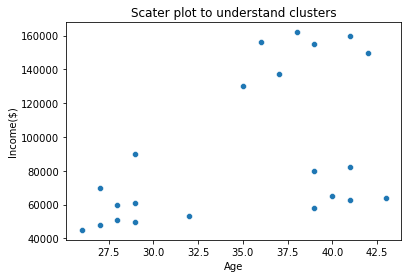

In [34]:
#Data viulization using scaterplot
sns.scatterplot(x=df["Age"],y=df["Income($)"])
plt.title("Scater plot to understand clusters");

<AxesSubplot:xlabel='Age', ylabel='count'>

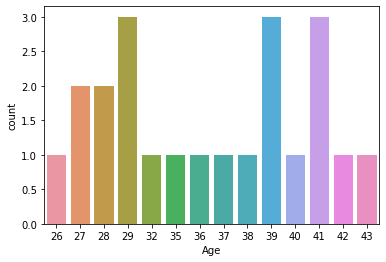

In [35]:
#Data viulization
sns.countplot(df["Age"])

In [36]:
#Null values
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [39]:
#Data standatdisation
ss=StandardScaler()
ss.fit(df[["Age"]])
df["Age"]=ss.transform(df[["Age"]])
ss.fit(df[["Income($)"]])
df["Income($)"]=ss.transform(df[["Income($)"]])
df

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417
5,Gautam,0.725332,1.519048
6,David,1.072230,1.636679
7,Andrea,0.551883,1.683732
8,Brad,0.204985,1.542574
9,Angelina,0.031536,0.930891


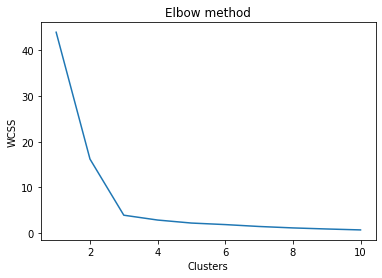

In [42]:
#Finding out the clusters
wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Clusters")
plt.ylabel("WCSS");

In [46]:
#Algorithm
km=KMeans(n_clusters=3)
#Fit
clusters=km.fit_predict(df[['Age','Income($)']])

In [47]:
df["Clusters"]=clusters


In [48]:
df

,Name,Age,Income($),Clusters
0,Rob,-1.356055,-0.480684,1
1,Michael,-1.009157,-0.010159,1
2,Mohan,-1.009157,-0.692421,1
3,Ismail,-1.182606,-0.715947,1
4,Kory,1.245679,1.401417,0
5,Gautam,0.725332,1.519048,0
6,David,1.072230,1.636679,0
7,Andrea,0.551883,1.683732,0
8,Brad,0.204985,1.542574,0
9,Angelina,0.031536,0.930891,0


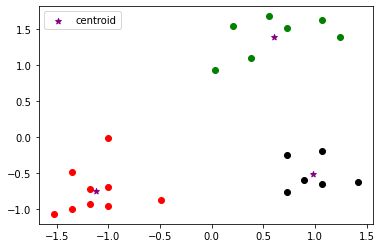

In [51]:
df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()